In [3]:
# prepare data 

mod_path = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/figshare/2_estimations/treatments_without_community_changes/"
obs_path = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/figshare/1_datasets_from_SPRUCE/in_treat_2014-2021/"
nsimu    = 1
com_path = "run_simu_ctl_"
nsimuyr  = 8


# read the data based on plots
ls_warmOnlyPlots = ["P06", "P20", "P13", "P08", "P17"]
ls_warmAndEleCO2 = ["P19", "P11", "P04", "P16", "P10"]
plot_names = ["P04", "P06",  "P08", "P10", "P11", "P13", "P16", "P17", "P19", "P20"]

import pandas as pd
import numpy as np

ls_vars = ["nep", "gpp", "gpp_Tree", "gpp_Shrub", "gpp_Sphagnum", "rh",
           "npp", "npp_Tree", "npp_Shrub", "npp_Sphagnum", 
           "nppLeaf", "nppLeaf_Tree", "nppLeaf_Shrub", "nppLeaf_Sphagnum",
           "nppStem", "nppStem_Tree", "nppStem_Shrub", "nppStem_Sphagnum",
           "nppRoot", "nppRoot_Tree", "nppRoot_Shrub", "nppRoot_Sphagnum",
           "cLeaf",   "cLeaf_Tree",   "cLeaf_Shrub",   "cLeaf_Sphagnum",
           "cStem",   "cStem_Tree",   "cStem_Shrub",   "cStem_Sphagnum",
           "cRoot",   "cRoot_Tree",   "cRoot_Shrub",   "cRoot_Sphagnum",
           "cSoil","ch4", "cLitterFine", "cLitterCwd",
           "ra",      "ra_Tree",      "ra_Shrub",      "ra_Sphagnum",
           "raLeaf",  "raLeaf_Tree",  "raLeaf_Shrub",  "raLeaf_Sphagnum",
           "raStem",  "raStem_Tree",  "raStem_Shrub",  "raStem_Sphagnum",
           "raRoot",  "raRoot_Tree",  "raRoot_Shrub",  "raRoot_Sphagnum",
           "rMaint",  "rMaint_Tree",  "rMaint_Shrub",   "rMaint_Sphagnum",	
           "rGrowth", 'rGrowth_Tree', 'rGrowth_Shrub',  'rGrowth_Sphagnum',
           "raOther", "raOther_Tree", "raOther_Shrub", "raOther_Sphagnum"]

dict_result = {}
for ivar in ls_vars:
    np_dat4plt = np.full((nsimu, nsimuyr, 10), np.nan)
    for ip, iplot in enumerate(plot_names):
        for i in range(nsimu):
            if i<9:    ifile = "00"+str(i+1)
            elif i<99: ifile = "0"+str(i+1)
            else:      ifile = str(i+1)
            dat_file = mod_path+"TECO-SPRUCE_"+com_path+iplot+"_Daily.csv"
            df_mod   = pd.read_csv(dat_file, index_col=None, na_values='NaN').fillna(0)
            df_mod.rename(columns={' year':"year"}, inplace=True)
            # GPP: Tree, Shrub, Sphagnum
            result = df_mod.groupby('year')['gpp_Tree'].sum().reset_index()
            result.set_index('year', inplace=True)
            result["gpp_Tree"]     = result["gpp_Tree"]*24*0.5 # 0.5 is the weight
            result["gpp_Shrub"]    = (df_mod.groupby('year')['gpp_Shrub'].sum().reset_index()["gpp_Shrub"].to_numpy().flatten())*24*0.25 # 0.25 is the weight
            result["gpp_Sphagnum"] = (df_mod.groupby('year')['gpp_Sphagnum'].sum().reset_index()["gpp_Sphagnum"].to_numpy().flatten())*24*0.25
            # NPP: Tree, Shrub, Sphagnum
            result["npp_Tree"]     = (df_mod.groupby('year')['npp_Tree'].sum().reset_index()["npp_Tree"].to_numpy().flatten())*24*0.5
            result["npp_Shrub"]    = (df_mod.groupby('year')['npp_Shrub'].sum().reset_index()["npp_Shrub"].to_numpy().flatten())*24*0.25
            result["npp_Sphagnum"] = (df_mod.groupby('year')['npp_Sphagnum'].sum().reset_index()["npp_Sphagnum"].to_numpy().flatten())*24*0.25
            # NPP parts: NPP_leaf, NPP_stem, NPP_root
            result["nppLeaf_Tree"]     = (df_mod.groupby('year')['nppLeaf_Tree'].sum().reset_index()["nppLeaf_Tree"].to_numpy().flatten())*24*0.5
            result["nppStem_Tree"]     = (df_mod.groupby('year')['nppStem_Tree'].sum().reset_index()["nppStem_Tree"].to_numpy().flatten())*24*0.5
            result["nppRoot_Tree"]     = (df_mod.groupby('year')['nppRoot_Tree'].sum().reset_index()["nppRoot_Tree"].to_numpy().flatten())*24*0.5
            result["nppLeaf_Shrub"]    = (df_mod.groupby('year')['nppLeaf_Shrub'].sum().reset_index()["nppLeaf_Shrub"].to_numpy().flatten())*24*0.25
            result["nppStem_Shrub"]    = (df_mod.groupby('year')['nppStem_Shrub'].sum().reset_index()["nppStem_Shrub"].to_numpy().flatten())*24*0.25
            result["nppRoot_Shrub"]    = (df_mod.groupby('year')['nppRoot_Shrub'].sum().reset_index()["nppRoot_Shrub"].to_numpy().flatten())*24*0.25
            result["nppLeaf_Sphagnum"] = (df_mod.groupby('year')['nppLeaf_Sphagnum'].sum().reset_index()["nppLeaf_Sphagnum"].to_numpy().flatten())*24*0.25
            result["nppStem_Sphagnum"] = (df_mod.groupby('year')['nppStem_Sphagnum'].sum().reset_index()["nppStem_Sphagnum"].to_numpy().flatten())*24*0.25
            result["nppRoot_Sphagnum"] = (df_mod.groupby('year')['nppRoot_Sphagnum'].sum().reset_index()["nppRoot_Sphagnum"].to_numpy().flatten())*24*0.25
            # ERa
            result["ra_Tree"]     = (df_mod.groupby('year')['ra_Tree'].sum().reset_index()["ra_Tree"].to_numpy().flatten())*24*0.5
            result["ra_Shrub"]    = (df_mod.groupby('year')['ra_Shrub'].sum().reset_index()["ra_Shrub"].to_numpy().flatten())*24*0.25
            result["ra_Sphagnum"] = (df_mod.groupby('year')['ra_Sphagnum'].sum().reset_index()["ra_Sphagnum"].to_numpy().flatten())*24*0.25
            # ERa: leaf(leaf+Ncost), stem, root
            result["raLeaf_Tree"]     = (df_mod.groupby('year')['raLeaf_Tree'].sum().reset_index()["raLeaf_Tree"].to_numpy().flatten())*24*0.5
            result["raStem_Tree"]     = (df_mod.groupby('year')['raStem_Tree'].sum().reset_index()["raStem_Tree"].to_numpy().flatten())*24*0.5
            result["raRoot_Tree"]     = (df_mod.groupby('year')['raRoot_Tree'].sum().reset_index()["raRoot_Tree"].to_numpy().flatten())*24*0.5
            result["raLeaf_Shrub"]    = (df_mod.groupby('year')['raLeaf_Shrub'].sum().reset_index()["raLeaf_Shrub"].to_numpy().flatten())*24*0.25
            result["raStem_Shrub"]    = (df_mod.groupby('year')['raStem_Shrub'].sum().reset_index()["raStem_Shrub"].to_numpy().flatten())*24*0.25
            result["raRoot_Shrub"]    = (df_mod.groupby('year')['raRoot_Shrub'].sum().reset_index()["raRoot_Shrub"].to_numpy().flatten())*24*0.25
            result["raLeaf_Sphagnum"] = (df_mod.groupby('year')['raLeaf_Sphagnum'].sum().reset_index()["raLeaf_Sphagnum"].to_numpy().flatten())*24*0.25
            result["raStem_Sphagnum"] = (df_mod.groupby('year')['raStem_Sphagnum'].sum().reset_index()["raStem_Sphagnum"].to_numpy().flatten())*24*0.25
            result["raRoot_Sphagnum"] = (df_mod.groupby('year')['raRoot_Sphagnum'].sum().reset_index()["raRoot_Sphagnum"].to_numpy().flatten())*24*0.25
            result["rMaint_Tree"]     = (df_mod.groupby('year')['rMaint_Tree'].sum().reset_index()["rMaint_Tree"].to_numpy().flatten())*24*0.5
            result["rMaint_Shrub"]    = (df_mod.groupby('year')['rMaint_Shrub'].sum().reset_index()["rMaint_Shrub"].to_numpy().flatten())*24*0.25
            result["rMaint_Sphagnum"] = (df_mod.groupby('year')['rMaint_Sphagnum'].sum().reset_index()["rMaint_Sphagnum"].to_numpy().flatten())*24*0.25
            result["rGrowth_Tree"]     = (df_mod.groupby('year')['rGrowth_Tree'].sum().reset_index()["rGrowth_Tree"].to_numpy().flatten())*24*0.5
            result["rGrowth_Shrub"]    = (df_mod.groupby('year')['rGrowth_Shrub'].sum().reset_index()["rGrowth_Shrub"].to_numpy().flatten())*24*0.25
            result["rGrowth_Sphagnum"] = (df_mod.groupby('year')['rGrowth_Sphagnum'].sum().reset_index()["rGrowth_Sphagnum"].to_numpy().flatten())*24*0.25
            result["rMaint"]           = result["rMaint_Tree"] + result["rMaint_Shrub"] + result["rMaint_Sphagnum"]
            result["rGrowth"]          = result["rGrowth_Tree"] + result["rGrowth_Shrub"] + result["rGrowth_Sphagnum"]
            result["raOther_Tree"]     = (df_mod.groupby('year')['raOther_Tree'].sum().reset_index()["raOther_Tree"].to_numpy().flatten())*24*0.5
            result["raOther_Shrub"]    = (df_mod.groupby('year')['raOther_Shrub'].sum().reset_index()["raOther_Shrub"].to_numpy().flatten())*24*0.25
            result["raOther_Sphagnum"] = (df_mod.groupby('year')['raOther_Sphagnum'].sum().reset_index()["raOther_Sphagnum"].to_numpy().flatten())*24*0.25
            result["raOther"]          = result["raOther_Tree"] + result["raOther_Shrub"] + result["raOther_Sphagnum"]
            # Rh:
            result["rh"]  = (df_mod.groupby('year')['rh'].sum().reset_index()["rh"].to_numpy().flatten())*24
            result["ch4"] = (df_mod.groupby('year')['wetlandCH4'].sum().reset_index()["wetlandCH4"].to_numpy().flatten())*24
            # C pools ------------------------------------------------------------------------------------------
            result["cLeaf_Tree"] = (df_mod.groupby('year')['cLeaf_Tree'].mean().reset_index()["cLeaf_Tree"].to_numpy().flatten())*0.5
            result["cStem_Tree"] = (df_mod.groupby('year')['cStem_Tree'].mean().reset_index()["cStem_Tree"].to_numpy().flatten())*0.5
            result["cRoot_Tree"] = (df_mod.groupby('year')['cRoot_Tree'].mean().reset_index()["cRoot_Tree"].to_numpy().flatten())*0.5
            result["cLeaf_Shrub"] = (df_mod.groupby('year')['cLeaf_Shrub'].mean().reset_index()["cLeaf_Shrub"].to_numpy().flatten())*0.25
            result["cStem_Shrub"] = (df_mod.groupby('year')['cStem_Shrub'].mean().reset_index()["cStem_Shrub"].to_numpy().flatten())*0.25
            result["cRoot_Shrub"] = (df_mod.groupby('year')['cRoot_Shrub'].mean().reset_index()["cRoot_Shrub"].to_numpy().flatten())*0.25
            result["cLeaf_Sphagnum"] = (df_mod.groupby('year')['cLeaf_Sphagnum'].mean().reset_index()["cLeaf_Sphagnum"].to_numpy().flatten())*0.25
            result["cStem_Sphagnum"] = (df_mod.groupby('year')['cStem_Sphagnum'].mean().reset_index()["cStem_Sphagnum"].to_numpy().flatten())*0.25
            result["cRoot_Sphagnum"] = (df_mod.groupby('year')['cRoot_Sphagnum'].mean().reset_index()["cRoot_Sphagnum"].to_numpy().flatten())*0.25
            # c Soil
            result["cSoilFast"]      = (df_mod.groupby('year')['cSoilFast'].mean().reset_index()["cSoilFast"].to_numpy().flatten())
            result["cSoilSlow"]      = (df_mod.groupby('year')['cSoilSlow'].mean().reset_index()["cSoilSlow"].to_numpy().flatten())
            result["cSoilPassive"]   = (df_mod.groupby('year')['cSoilPassive'].mean().reset_index()["cSoilPassive"].to_numpy().flatten())
            result["cSoil"]          = result["cSoilFast"] + result["cSoilSlow"] + result["cSoilPassive"]
            # c Litter
            result["cLitterFine"]    = (df_mod.groupby('year')['cLitter'].mean().reset_index()["cLitter"].to_numpy().flatten())
            result["cLitterCwd"]     = (df_mod.groupby('year')['cLitterCwd'].mean().reset_index()["cLitterCwd"].to_numpy().flatten())
            result["cLitter"]        = result["cLitterFine"] + result["cLitterCwd"]
            # LAI
            result["lai_Tree"]      = (df_mod.groupby('year')['lai_Tree'].mean().reset_index()["lai_Tree"].to_numpy().flatten())*0.5
            result["lai_Shrub"]     = (df_mod.groupby('year')['lai_Shrub'].mean().reset_index()["lai_Shrub"].to_numpy().flatten())*0.25
            result["lai_Sphagnum"]  = (df_mod.groupby('year')['lai_Sphagnum'].mean().reset_index()["lai_Sphagnum"].to_numpy().flatten())*0.25
            result["lai"]           = result["lai_Tree"] + result["lai_Shrub"] + result["lai_Sphagnum"]
            # ----------------------------------------------------------------------------------------------------
            print(iplot, i)#, result["ch4"])
            result["nep"]     = result["npp_Tree"]     + result["npp_Shrub"]     + result["npp_Sphagnum"]     - result['rh'] - result['ch4']
            result["gpp"]     = result["gpp_Tree"]     + result["gpp_Shrub"]     + result["gpp_Sphagnum"]
            result["npp"]     = result["npp_Tree"]     + result["npp_Shrub"]     + result["npp_Sphagnum"]
            result["nppLeaf"] = result["nppLeaf_Tree"] + result["nppLeaf_Shrub"] + result["nppLeaf_Sphagnum"]
            result["nppStem"] = result["nppStem_Tree"] + result["nppStem_Shrub"] + result["nppStem_Sphagnum"]
            result["nppRoot"] = result["nppRoot_Tree"] + result["nppRoot_Shrub"] + result["nppRoot_Sphagnum"]
            result["ra"]      = result["ra_Tree"]      + result["ra_Shrub"]      + result["ra_Sphagnum"]
            result["raLeaf"]  = result["raLeaf_Tree"]  + result["raLeaf_Shrub"]  + result["raLeaf_Sphagnum"]
            result["raStem"]  = result["raStem_Tree"]  + result["raStem_Shrub"]  + result["raStem_Sphagnum"]
            result["raRoot"]  = result["raRoot_Tree"]  + result["raRoot_Shrub"]  + result["raRoot_Sphagnum"]
            result["cLeaf"]   = result["cLeaf_Tree"]   + result["cLeaf_Shrub"]   + result["cLeaf_Sphagnum"]
            result["cStem"]   = result["cStem_Tree"]   + result["cStem_Shrub"]   + result["cStem_Sphagnum"]
            result["cRoot"]   = result["cRoot_Tree"]   + result["cRoot_Shrub"]   + result["cRoot_Sphagnum"]
            # print(iplot, ivar,result[ivar].to_numpy().flatten())
            np_dat4plt[i, :, ip] = result[ivar].to_numpy().flatten()
    dict_result[ivar] = np_dat4plt
# print(dict_result)
import pickle

with open('/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/3_mod_without_acc/sourcedata.pkl', 'wb') as file:
    pickle.dump(dict_result, file)

P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 

In [4]:
# Normalize the data based on MLM

import pandas as pd
import numpy  as np
import pickle
import statsmodels.api as sm

ls_simu_years = [ 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] 

# read the data
src_data = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/3_mod_without_acc/"
with open(src_data+'sourcedata.pkl', 'rb') as file:
    dict_result = pickle.load(file)
folder_mlm      = src_data+"results_MLM"
folder_mlm_res1 = src_data+"results_MLM/1_2_1_data_MLM/"
folder_mlm_res2 = src_data+"results_MLM/1_2_2_data_stat/"
import os
for ifolder in [folder_mlm, folder_mlm_res1, folder_mlm_res2]:
    if not os.path.exists(ifolder):
        os.makedirs(ifolder)

# print(dict_result.keys())

var_names = [
    "gpp", 'gpp_Tree', 'gpp_Shrub', 'gpp_Sphagnum',
    "npp", 'npp_Tree', 'npp_Shrub', 'npp_Sphagnum',
    "nppLeaf", "nppLeaf_Tree", "nppLeaf_Shrub", "nppLeaf_Sphagnum",
    "nppStem", "nppStem_Tree", "nppStem_Shrub", "nppStem_Sphagnum",
    "nppRoot", "nppRoot_Tree", "nppRoot_Shrub", "nppRoot_Sphagnum",
    "ra",  'ra_Tree',  'ra_Shrub',  'ra_Sphagnum',
    "rh", "ch4", "nep","nce", "r",
    "cLeaf", 'cLeaf_Tree', 'cLeaf_Shrub', 'cLeaf_Sphagnum',
    "cStem", 'cStem_Tree', 'cStem_Shrub', 'cStem_Sphagnum',
    "cRoot", 'cRoot_Tree', 'cRoot_Shrub', 'cRoot_Sphagnum',
    "cPlant", "cPlant_Tree", "cPlant_Shrub", "cPlant_Sphagnum",
    "cLitter", "cSoil", 
    "Alloc_npp_AB", "Alloc_npp_AB_Tree", "Alloc_npp_AB_Shrub", "Alloc_npp_AB_Sphagnum",
    "del_C", #"del_C_Tree", "del_C_Shrub", "del_C_Sphagnum",
    "del_C_plant", "del_C_plant_Tree", "del_C_plant_Shrub", "del_C_plant_Sphagnum",
    "del_C_leaf",  "del_C_leaf_Tree", "del_C_leaf_Shrub", "del_C_leaf_Sphagnum",
    "del_C_stem",  "del_C_stem_Tree", "del_C_stem_Shrub", "del_C_stem_Sphagnum",
    "del_C_root",  "del_C_root_Tree", "del_C_root_Shrub", "del_C_root_Sphagnum",
    "del_C_plant_above", "del_C_plant_above_Tree", "del_C_plant_above_Shrub", "del_C_plant_above_Sphagnum", 
    "del_C_plant_below", "del_C_plant_below_Tree", "del_C_plant_below_Shrub", "del_C_plant_below_Sphagnum",
    "del_C_litter", #"del_C_litter_Tree", "del_C_litter_Shrub", "del_C_litter_Sphagnum",
    "del_C_soil"
]

col_names = ["year", "plot", "warming", "eCO2", "eCO2_warming","biomass_pre", "biomass"]
# define the dataframe to save the results from MLM
df_res_mlm = pd.DataFrame(columns = col_names)
# define the dataframe to save the statistic results from MLM
df_res_stats = pd.DataFrame(columns = ["co2_coef", "co2_pval", "warm_coef", "warm_pval", "co2_warm_coef", "co2_warm_pval"])
ls_idx_stats = []
i_warmPlots  = [1, 9, 5, 2, 7]
i_warmEleCO2 = [8, 4, 0, 6, 3]
ls_temp      = [0, 2.25, 4.5, 6.75, 9]
val_biomass  = np.nanmean(dict_result["cLeaf"] + dict_result["cStem"] + dict_result["cRoot"], axis=0)



for idx_var, ivar in enumerate(var_names):
    # read the data
    if   ivar == "r"                          : val_mean = np.nanmean(dict_result["ra"] + dict_result["rh"], axis=0)
    elif ivar == "cLitter"                    : val_mean = np.nanmean(dict_result["cLitterFine"] + dict_result["cLitterCwd"], axis=0)
    elif ivar == "cPlant"                     : val_mean = np.nanmean(dict_result["cLeaf"]          + dict_result["cStem"]          + dict_result["cRoot"],          axis=0)  
    elif ivar == "cPlant_Tree"                : val_mean = np.nanmean(dict_result["cLeaf_Tree"]     + dict_result["cStem_Tree"]     + dict_result["cRoot_Tree"],     axis=0) 
    elif ivar == "cPlant_Shrub"               : val_mean = np.nanmean(dict_result["cLeaf_Shrub"]    + dict_result["cStem_Shrub"]    + dict_result["cRoot_Shrub"],    axis=0) 
    elif ivar == "cPlant_Sphagnum"            : val_mean = np.nanmean(dict_result["cLeaf_Sphagnum"] + dict_result["cStem_Sphagnum"] + dict_result["cRoot_Sphagnum"], axis=0) 
    elif ivar == "nep"                        : val_mean = np.nanmean(dict_result["nep"] + dict_result["ch4"], axis=0)
    elif ivar == "nce"                        : val_mean = np.nanmean(dict_result["nep"], axis=0)
    elif ivar == "Alloc_npp_AB"               : val_mean = np.nanmean(dict_result["nppRoot"]         /(dict_result["nppLeaf"]          + dict_result["nppStem"]),          axis=0)
    elif ivar == "Alloc_npp_AB_Tree"          : val_mean = np.nanmean(dict_result["nppRoot_Tree"]    /(dict_result["nppLeaf_Tree"]     + dict_result["nppStem_Tree"]),     axis=0)
    elif ivar == "Alloc_npp_AB_Shrub"         : val_mean = np.nanmean(dict_result["nppRoot_Shrub"]   /(dict_result["nppLeaf_Shrub"]    + dict_result["nppStem_Shrub"]),    axis=0)
    elif ivar == "Alloc_npp_AB_Sphagnum"      : val_mean = np.nanmean(dict_result["nppRoot_Sphagnum"]/(dict_result["nppLeaf_Sphagnum"] + dict_result["nppStem_Sphagnum"]), axis=0)
    elif ivar == "del_C"                      : val_mean = np.nanmean(dict_result["cLeaf"] + dict_result["cStem"] + dict_result["cRoot"] + dict_result["cLitterFine"] + dict_result["cLitterCwd"] + dict_result["cSoil"], axis=0)
    elif ivar == "del_C_plant"                : val_mean = np.nanmean(dict_result["cLeaf"]          + dict_result["cStem"]          + dict_result["cRoot"],          axis=0)
    elif ivar == "del_C_plant_Tree"           : val_mean = np.nanmean(dict_result["cLeaf_Tree"]     + dict_result["cStem_Tree"]     + dict_result["cRoot_Tree"],     axis=0)
    elif ivar == "del_C_plant_Shrub"          : val_mean = np.nanmean(dict_result["cLeaf_Shrub"]    + dict_result["cStem_Shrub"]    + dict_result["cRoot_Shrub"],    axis=0)
    elif ivar == "del_C_plant_Sphagnum"       : val_mean = np.nanmean(dict_result["cLeaf_Sphagnum"] + dict_result["cStem_Sphagnum"] + dict_result["cRoot_Sphagnum"], axis=0)
    elif ivar == "del_C_litter"               : val_mean = np.nanmean(dict_result["cLitterFine"] + dict_result["cLitterCwd"], axis=0)
    elif ivar == "del_C_soil"                 : val_mean = np.nanmean(dict_result["cSoil"],          axis=0)
    elif ivar == "del_C_leaf"                 : val_mean = np.nanmean(dict_result["cLeaf"],          axis=0)
    elif ivar == "del_C_leaf_Tree"            : val_mean = np.nanmean(dict_result["cLeaf_Tree"],     axis=0)
    elif ivar == "del_C_leaf_Shrub"           : val_mean = np.nanmean(dict_result["cLeaf_Shrub"],    axis=0)
    elif ivar == "del_C_leaf_Sphagnum"        : val_mean = np.nanmean(dict_result["cLeaf_Sphagnum"], axis=0)
    elif ivar == "del_C_stem"                 : val_mean = np.nanmean(dict_result["cStem"],          axis=0)
    elif ivar == "del_C_stem_Tree"            : val_mean = np.nanmean(dict_result["cStem_Tree"],     axis=0)
    elif ivar == "del_C_stem_Shrub"           : val_mean = np.nanmean(dict_result["cStem_Shrub"],    axis=0)
    elif ivar == "del_C_stem_Sphagnum"        : val_mean = np.nanmean(dict_result["cStem_Sphagnum"], axis=0)
    elif ivar == "del_C_root"                 : val_mean = np.nanmean(dict_result["cRoot"],          axis=0)
    elif ivar == "del_C_root_Tree"            : val_mean = np.nanmean(dict_result["cRoot_Tree"],     axis=0)
    elif ivar == "del_C_root_Shrub"           : val_mean = np.nanmean(dict_result["cRoot_Shrub"],    axis=0)
    elif ivar == "del_C_root_Sphagnum"        : val_mean = np.nanmean(dict_result["cRoot_Sphagnum"], axis=0)
    elif ivar == "del_C_plant_above"          : val_mean = np.nanmean(dict_result["cLeaf"]          + dict_result["cStem"],          axis=0)
    elif ivar == "del_C_plant_above_Tree"     : val_mean = np.nanmean(dict_result["cLeaf_Tree"]     + dict_result["cStem_Tree"],     axis=0)
    elif ivar == "del_C_plant_above_Shrub"    : val_mean = np.nanmean(dict_result["cLeaf_Shrub"]    + dict_result["cStem_Shrub"],    axis=0)
    elif ivar == "del_C_plant_above_Sphagnum" : val_mean = np.nanmean(dict_result["cLeaf_Sphagnum"] + dict_result["cStem_Sphagnum"], axis=0)
    elif ivar == "del_C_plant_below"          : val_mean = np.nanmean(dict_result["cRoot"],          axis=0)
    elif ivar == "del_C_plant_below_Tree"     : val_mean = np.nanmean(dict_result["cRoot_Tree"],     axis=0)
    elif ivar == "del_C_plant_below_Shrub"    : val_mean = np.nanmean(dict_result["cRoot_Shrub"],    axis=0)
    elif ivar == "del_C_plant_below_Sphagnum" : val_mean = np.nanmean(dict_result["cRoot_Sphagnum"], axis=0)
    else                                      : val_mean = np.nanmean(dict_result[ivar], axis=0)
    # if need to calculate the diff
    if ivar.split("_")[0] == "del"            : val_mean[1:,:] = val_mean[1:,:] - val_mean[:-1,:]
    df_data   = pd.DataFrame(columns=col_names.append(ivar)) # mark the new dataframe for ivar: "year", "plot", "warming", "eCO2", "eCO2_warming","biomass_pre", "biomass", ivar
    for idx in range(10): # different plots
        dict_data = {}
        dict_data["year"] = ls_simu_years
        if idx in i_warmPlots: 
            idx_temp = i_warmPlots.index(idx)
            dict_data["eCO2"] = np.zeros(len(ls_simu_years)) + 400
        elif idx in i_warmEleCO2:
            idx_temp = i_warmEleCO2.index(idx)
            dict_data["eCO2"] = np.zeros(len(ls_simu_years)) + 900
        dict_data["warming"]      = [ls_temp[idx_temp]] * len(ls_simu_years)#, ls_temp[idx_temp], ls_temp[idx_temp], ls_temp[idx_temp], ls_temp[idx_temp], ls_temp[idx_temp], ls_temp[idx_temp]]
        dict_data["plot"]         = [idx] * len(ls_simu_years)#, idx, idx, idx, idx, idx, idx]
        dict_data["biomass_pre"]  = [val_biomass[0, idx]] * len(ls_simu_years)#, val_biomass[0, idx], val_biomass[0, idx], val_biomass[0, idx], val_biomass[0, idx], val_biomass[0, idx], val_biomass[0, idx]]
        dict_data["biomass"]      = val_biomass[:,idx]
        dict_data["eCO2_warming"] = dict_data["warming"] * dict_data["eCO2"]
        dict_data[ivar]           = val_mean[:,idx]
        # tranfer dict to DataFrame
        dict_df = pd.DataFrame([dict_data])
        new_df  = pd.DataFrame.from_dict(dict_data)
        # update df_data
        df_data = pd.concat([df_data, new_df], ignore_index=True)

    # data         = df_data[df_data["year"]>2016]  
    data = df_data.copy()  
    data['year'] = pd.to_numeric(data['year'])
    data['eCO2'] = pd.to_numeric(data['eCO2'])
    mixed_model  = sm.MixedLM.from_formula(ivar + " ~ eCO2 + warming + eCO2_warming + year  + biomass_pre", data, groups=data["plot"], re_formula="1")
    mdf = mixed_model.fit(method='nm')

    with open(folder_mlm_res2+'/model_summary_' + ivar +'.txt', 'w') as f:
        f.write(mdf.summary().as_text())

    df_res_mlm["year"]         = data["year"]
    df_res_mlm["plot"]         = data["plot"]
    df_res_mlm["warming"]      = data["warming"]
    df_res_mlm["eCO2"]         = data["eCO2"]
    df_res_mlm["eCO2_warming"] = data["eCO2_warming"]
    df_res_mlm["biomass_pre"]  = data["biomass_pre"]
    df_res_mlm["biomass"]      = data["biomass"]
    df_res_mlm[ivar]           = data[ivar]

    df_res_stats.loc[len(df_res_stats)] = [mdf.params['eCO2'], mdf.pvalues['eCO2'], mdf.params['warming'], mdf.pvalues['warming'], mdf.params['eCO2_warming'], mdf.pvalues['eCO2_warming']]
    ls_idx_stats.append(ivar)

    df_res_mlm[ivar+"_mlm_nomean"] = mdf.predict(data)
    mean_biomass = data["biomass_pre"].mean()
    data["biomass_pre"] = mean_biomass
    predicted = mdf.predict(data)

    df_res_mlm[ivar+"_mlm"]   = predicted

df_res_mlm.to_excel(folder_mlm_res1+"2_df_res_mlm_yrDel_nomean.xlsx", index=False)
df_res_stats.index = ls_idx_stats
df_res_stats.to_excel(folder_mlm_res2+"2_df_res_stats_index_yrDel_nomean.xlsx")


/Users/jianzhou/miniconda3/envs/spruce-data/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/jianzhou/miniconda3/envs/spruce-data/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/jianzhou/miniconda3/envs/spruce-data/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/jianzhou/miniconda3/envs/spruce-data/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceW

Index(['year', 'plot', 'warming', 'eCO2', 'eCO2_warming', 'biomass_pre',
       'biomass', 'gpp', 'gpp_mlm_nomean', 'gpp_mlm',
       ...
       'del_C_plant_below_Shrub_mlm', 'del_C_plant_below_Sphagnum',
       'del_C_plant_below_Sphagnum_mlm_nomean',
       'del_C_plant_below_Sphagnum_mlm', 'del_C_litter',
       'del_C_litter_mlm_nomean', 'del_C_litter_mlm', 'del_C_soil',
       'del_C_soil_mlm_nomean', 'del_C_soil_mlm'],
      dtype='object', length=241)
3     470.2722
4     388.1796
5     401.3538
6     485.2140
7     497.2284
11    335.9430
12    289.4184
13    293.1144
14    351.1572
15    375.8796
19    367.6092
20    280.1562
21    292.1454
22    360.2808
23    376.5138
27    479.4036
28    376.2174
29    394.5018
30    484.0608
31    488.3238
35    452.7780
36    383.1372
37    391.2828
38    470.2500
39    486.2022
43    366.5370
44    292.7538
45    301.1676
46    365.3286
47    384.9570
51    474.9522
52    375.7302
53    401.6772
54    489.4842
55    495.5118
59    355.5

/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50249/4196184522.py:150: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)
/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50249/4196184522.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)
/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50249/4196184522.py:278: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)
/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50249/4196184522.py:346: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

ra [-247.00631999999996, -203.34935999999993, -260.51952, -259.45895999999993, -241.84512] [25.885533844400452, 45.79588335200447, 42.75304756530929, 41.893865598562265, 34.55883714585315]
0.0020820789080589763
rh [-57.788639999999944, -81.88175999999999, -72.00287999999998, -59.56607999999996, -117.2424] [63.08750175892525, 30.892182638952587, 61.83366396643174, 78.04187706462217, 123.09862740342801]
rh_aco2 [-390.88032000000004, -420.69744000000003, -476.0385600000001, -511.45439999999996, -515.9385599999999] [57.40255704765775, 73.61908514013471, 65.79110868734773, 67.72851661886595, 62.39306142838641]
rh_eco2 [-448.66895999999997, -502.57919999999996, -548.04144, -571.0204799999999, -633.18096] [90.25076964586174, 48.09230376216133, 62.760681717444726, 90.74582782057587, 84.27322803950496]
0.0009526873531760363
ch4 [-0.2241600000000002, -3.94992, -2.3136, 1.9416000000000007, -3.0249599999999996] [3.8712577602634517, 3.1206517719220135, 3.145246287335859, 5.084212930238071, 8.117375

/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50249/4196184522.py:411: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)
/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50249/4196184522.py:476: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


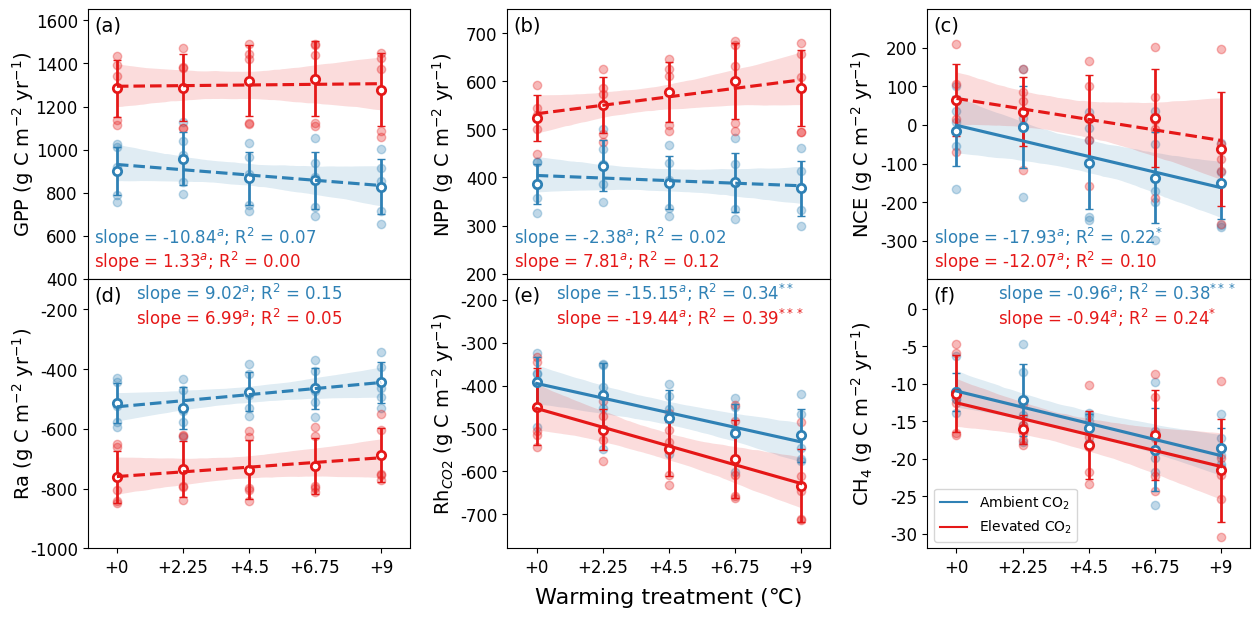

In [5]:

# figures based on suggestions
# figure-1: GPP, NPP, NEP, Ra, Rh

import pandas as pd

df_data_mlm = pd.read_excel("/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/3_mod_without_acc/results_MLM/1_2_1_data_MLM/2_df_res_mlm_yrDel_nomean.xlsx")

var_names_in = ["plot",        'warming', 'year',
                "gpp_Tree",    "gpp_Shrub",    "gpp_Sphagnum", 
                "npp_Tree",    "npp_Shrub",    "npp_Sphagnum", 
                "ra_Tree",     "ra_Shrub",     "ra_Sphagnum",    
                "rh", 
                "del_C_plant_Tree", "del_C_plant_Shrub", "del_C_plant_Sphagnum", 
                "del_C_litter",     "del_C_soil", "ch4"]

print(df_data_mlm.columns)
i_warmPlots  = [1, 9, 5, 2, 7]
i_warmEleCO2 = [8, 4, 0, 6, 3]

df_data = df_data_mlm[var_names_in]
df_data = df_data[df_data["year"] > 2016]

# print(df_data)

import statsmodels.api as sm
import statsmodels.formula.api as smf

def cal_reg_diff(x1, y1, x2, y2):
    # data = pd.DataFrame({'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2})
    # data['interaction'] = data['x1'] * data['x2']
    # model = sm.OLS(data['y1'], sm.add_constant(data[['x1', 'x2', 'interaction']])).fit()
    # interaction_p_value = model.pvalues['interaction']
    # print("Interaction p-value:", interaction_p_value)
    # alpha = 0.05
    # if interaction_p_value < alpha:
    #     # print("拒绝零假设，表示两条回归线之间存在显著差异。")
    #     ab = ("a", "b")
    # else:
    #     # print("接受零假设，表示两条回归线之间没有显著差异。")
    #     ab = ("a", "a")
    # return ab

    # np.random.seed(0)
    # x1 = np.random.randn(50)
    # y1 = 2 * x1 + np.random.randn(50) * 0.5  # 第一组数据的回归线 y = 2x + e

    # x2 = np.random.randn(50)
    # y2 = 3 * x2 + np.random.randn(50) * 0.5  # 第二组数据的回归线 y = 3x + e

    # 将数据组合到一起，并创建一个组别标识变量
    x = np.concatenate([x1, x2])
    y = np.concatenate([y1, y2])
    group = np.array([1]*len(x1) + [2]*len(x2))  # 1 表示第一组，2 表示第二组

    # 创建一个包含交互项的模型
    data = {'y': y, 'x': x, 'group': group}
    model = smf.ols('y ~ x + group + x * C(group)', data=data).fit()

    # 查看模型结果
    # model.summary()
    # print(model.pvalues['x:C(group)[T.2]'])
    interaction_p_value = model.pvalues['x:C(group)[T.2]']
    alpha = 0.05
    if interaction_p_value < alpha:
        # print("拒绝零假设，表示两条回归线之间存在显著差异。")
        ab = ("a", "b")
    else:
        # print("接受零假设，表示两条回归线之间没有显著差异。")
        ab = ("a", "a")
    return ab


# start to plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import matplotlib.ticker as ticker


def to_int(x, pos):
    return '{:.0f}'.format(x)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15,7))#, sharex=True)#, sharey=True)
x_bar = [0, 2.25, 4.5, 6.75, 9]
custom_x_ticks = [0, 2.25, 4.5, 6.75, 9]  # 自定义 x 轴刻度位置
custom_x_labels = ['+0', '+2.25', '+4.5', '+6.75', '+9']  # 对应的刻度标签


ivar = "gpp"
df_data_ivar = df_data[["plot", 'warming', 'year']]
df_data_ivar = df_data_ivar.assign(gpp = df_data["gpp_Tree"] + df_data["gpp_Shrub"] + df_data["gpp_Sphagnum"])# - (df_data["ra_Tree"] + df_data["ra_Shrub"] + df_data["ra_Sphagnum"]) - df_data["rh"])
print(df_data["gpp_Sphagnum"])
x = []
y = []
y_bar_aco2 = []
y_bar_eco2 = []
y_bar_err_aco2 = []
y_bar_err_eco2 = []
y_aco2 = []
y_eco2 = []
diff_mean = []
diff_std  = []
diff_per  = []
for iwarm, ico2 in zip(i_warmPlots, i_warmEleCO2):
    x.extend(df_data_ivar[df_data_ivar["plot"]==ico2]["warming"])   # = df_data_ivar[df_data_ivar["plot"]==ico2][ivar]
    diff = (df_data_ivar[df_data_ivar["plot"]==iwarm][ivar]).to_numpy().flatten()
    y_aco2.extend(diff.tolist())
    y_bar_aco2.append(np.nanmean(np.array(diff)))
    y_bar_err_aco2.append(np.nanstd(np.array(diff)))
    diff_aco2 = diff
    diff = (df_data_ivar[df_data_ivar["plot"]==ico2][ivar]).to_numpy().flatten()
    diff_eco2 = diff
    y_eco2.extend(diff.tolist())
    y_bar_eco2.append(np.nanmean(np.array(diff)))
    y_bar_err_eco2.append(np.nanstd(diff))
    diff_mean.append(np.nanmean(diff_eco2 - diff_aco2))
    diff_std.append(np.nanstd(diff_eco2 - diff_aco2))
    diff_per.append(np.nanmean((diff_eco2 - diff_aco2)/diff_aco2))
ax=axes[0,0]
ax.scatter(x,y_aco2,alpha=0.3,color="#2F81B5",zorder=1)
ax.scatter(x,y_eco2,alpha=0.3,color="#E51818",zorder=1)
ax.errorbar(x_bar, y_bar_aco2, yerr=[np.array(y_bar_err_aco2), np.array(y_bar_err_aco2)], fmt='none', ecolor='#2F81B5', capsize=3, linewidth=2,zorder=2)
ax.errorbar(x_bar, y_bar_eco2, yerr=[np.array(y_bar_err_eco2), np.array(y_bar_err_eco2)], fmt='none', ecolor='#E51818', capsize=3, linewidth=2,zorder=2)
ax.scatter(x_bar, y_bar_aco2, marker='o', color='white', edgecolors='#2F81B5', linewidth=2, zorder=3)
ax.scatter(x_bar, y_bar_eco2, marker='o', color='white', edgecolors='#E51818', linewidth=2, zorder=3)
print("test_x: ", x)
slope, intercept, r_value, p_value, std_err = linregress(x, y_aco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_aco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style}, scatter=False, color="#2F81B5") #, color="#2F81B5",  label="Ambient CO$_2$")
ax.lines[-1].set_zorder(4) 
str_reg_diff = cal_reg_diff(x,y_aco2,x,y_eco2)
ax.text(0.02, 0.11, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[0],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#2F81B5", va='bottom')
slope, intercept, r_value, p_value, std_err = linregress(x, y_eco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_eco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style},scatter=False, color="#E51818")
ax.lines[-1].set_zorder(4) 
ax.text(0.02, 0.02, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[1],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#E51818", va='bottom', zorder=4)
# ax.set_ylabel("GPP (g C m$^{-2}$ yr$^{-1}$)", fontsize=14)
ax.text(0.02, 0.92, "(a)", fontsize=14, transform=ax.transAxes)
ax.set_xlim(-1, 10)
ax.set_ylim(400, 1650)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_int))
ax.set_xticks([])
print("gpp", diff_mean,diff_std,diff_per)
print("gpp_aco2", y_bar_aco2, y_bar_err_aco2)
print("gpp_eco2", y_bar_eco2, y_bar_err_eco2)



ivar = "npp"
df_data_ivar = df_data[["plot", 'warming', 'year']]
df_data_ivar = df_data_ivar.assign(npp = df_data["npp_Tree"] + df_data["npp_Shrub"] + df_data["npp_Sphagnum"])
x = []
y = []
y_bar_aco2 = []
y_bar_eco2 = []
y_bar_err_aco2 = []
y_bar_err_eco2 = []
y_aco2 = []
y_eco2 = []
diff_mean = []
diff_std  = []
diff_per  = []
for iwarm, ico2 in zip(i_warmPlots, i_warmEleCO2):
    x.extend(df_data_ivar[df_data_ivar["plot"]==ico2]["warming"])   # = df_data_ivar[df_data_ivar["plot"]==ico2][ivar]
    diff = (df_data_ivar[df_data_ivar["plot"]==iwarm][ivar]).to_numpy().flatten()
    y_aco2.extend(diff.tolist())
    y_bar_aco2.append(np.nanmean(np.array(diff)))
    y_bar_err_aco2.append(np.nanstd(np.array(diff)))
    diff_aco2 = diff
    diff = (df_data_ivar[df_data_ivar["plot"]==ico2][ivar]).to_numpy().flatten()
    diff_eco2 = diff
    y_eco2.extend(diff.tolist())
    y_bar_eco2.append(np.nanmean(np.array(diff)))
    y_bar_err_eco2.append(np.nanstd(diff))
    diff_mean.append(np.nanmean(diff_eco2 - diff_aco2))
    diff_std.append(np.nanstd(diff_eco2 - diff_aco2))
    diff_per.append(np.nanmean((diff_eco2 - diff_aco2)/diff_aco2))
ax=axes[0,1]
ax.scatter(x,y_aco2,alpha=0.3,color="#2F81B5",zorder=1)
ax.scatter(x,y_eco2,alpha=0.3,color="#E51818",zorder=1)
ax.errorbar(x_bar, y_bar_aco2, yerr=[np.array(y_bar_err_aco2), np.array(y_bar_err_aco2)], fmt='none', ecolor='#2F81B5', capsize=3, linewidth=2,zorder=2)
ax.errorbar(x_bar, y_bar_eco2, yerr=[np.array(y_bar_err_eco2), np.array(y_bar_err_eco2)], fmt='none', ecolor='#E51818', capsize=3, linewidth=2,zorder=2)
ax.scatter(x_bar, y_bar_aco2, marker='o', color='white', edgecolors='#2F81B5', linewidth=2, zorder=3)
ax.scatter(x_bar, y_bar_eco2, marker='o', color='white', edgecolors='#E51818', linewidth=2, zorder=3)
slope, intercept, r_value, p_value, std_err = linregress(x, y_aco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_aco2,  ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style}, scatter=False, color="#2F81B5") #, color="#2F81B5",  label="Ambient CO$_2$")
ax.lines[-1].set_zorder(4) 
str_reg_diff = cal_reg_diff(x,y_aco2,x,y_eco2)
ax.text(0.02, 0.11, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[0],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#2F81B5", va='bottom')
slope, intercept, r_value, p_value, std_err = linregress(x, y_eco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_eco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style},scatter=False, color="#E51818")
ax.lines[-1].set_zorder(4) 
ax.text(0.02, 0.02, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[1],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#E51818", va='bottom')
# ax.set_ylabel("NPP (g C m$^{-2}$ yr$^{-1}$)", fontsize=14)
ax.text(0.02, 0.92, "(b)", fontsize=14, transform=ax.transAxes)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_int))
ax.set_xlim(-1, 10)
ax.set_ylim(189, 749)
ax.set_xticks([])
print("npp", diff_mean,diff_std)



ivar = "nce"
df_data_ivar = df_data[["plot", 'warming', 'year']]
df_data_ivar = df_data_ivar.assign(nce = df_data["gpp_Tree"] + df_data["gpp_Shrub"] + df_data["gpp_Sphagnum"] - (df_data["ra_Tree"] + df_data["ra_Shrub"] + df_data["ra_Sphagnum"]) - df_data["rh"] - df_data["ch4"])
x = []
y = []
y_bar_aco2 = []
y_bar_eco2 = []
y_bar_err_aco2 = []
y_bar_err_eco2 = []
y_aco2 = []
y_eco2 = []
diff_mean = []
diff_std  = []
diff_per  = []
for iwarm, ico2 in zip(i_warmPlots, i_warmEleCO2):
    x.extend(df_data_ivar[df_data_ivar["plot"]==ico2]["warming"])   # = df_data_ivar[df_data_ivar["plot"]==ico2][ivar]
    diff = (df_data_ivar[df_data_ivar["plot"]==iwarm][ivar]).to_numpy().flatten()
    y_aco2.extend(diff.tolist())
    y_bar_aco2.append(np.nanmean(np.array(diff)))
    y_bar_err_aco2.append(np.nanstd(np.array(diff)))
    diff_aco2 = diff
    diff = (df_data_ivar[df_data_ivar["plot"]==ico2][ivar]).to_numpy().flatten()
    diff_eco2 = diff
    y_eco2.extend(diff.tolist())
    y_bar_eco2.append(np.nanmean(np.array(diff)))
    y_bar_err_eco2.append(np.nanstd(diff))
    diff_mean.append(np.nanmean(diff_eco2 - diff_aco2))
    diff_std.append(np.nanstd(diff_eco2 - diff_aco2))
    diff_per.append(np.nanmean((diff_eco2 - diff_aco2)/diff_aco2))
ax=axes[0,2]
ax.scatter(x,y_aco2,alpha=0.3,color="#2F81B5",zorder=1)
ax.scatter(x,y_eco2,alpha=0.3,color="#E51818",zorder=1)
ax.errorbar(x_bar, y_bar_aco2, yerr=[np.array(y_bar_err_aco2), np.array(y_bar_err_aco2)], fmt='none', ecolor='#2F81B5', capsize=3, linewidth=2,zorder=2)
ax.errorbar(x_bar, y_bar_eco2, yerr=[np.array(y_bar_err_eco2), np.array(y_bar_err_eco2)], fmt='none', ecolor='#E51818', capsize=3, linewidth=2,zorder=2)
ax.scatter(x_bar, y_bar_aco2, marker='o', color='white', edgecolors='#2F81B5', linewidth=2, zorder=3)
ax.scatter(x_bar, y_bar_eco2, marker='o', color='white', edgecolors='#E51818', linewidth=2, zorder=3)
slope, intercept, r_value, p_value, std_err = linregress(x, y_aco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_aco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style}, scatter=False, color="#2F81B5") #, color="#2F81B5",  label="Ambient CO$_2$")
ax.lines[-1].set_zorder(4) 
str_reg_diff = cal_reg_diff(x,y_aco2,x,y_eco2)
ax.text(0.02, 0.11, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[0],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#2F81B5", va='bottom')
slope, intercept, r_value, p_value, std_err = linregress(x, y_eco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_eco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style},scatter=False, color="#E51818")
ax.lines[-1].set_zorder(4) 
ax.text(0.02, 0.02, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[1],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#E51818", va='bottom')
# ax.set_ylabel("NEP (g C m$^{-2}$ yr$^{-1}$)", fontsize=14)
ax.text(0.02, 0.92, "(c)", fontsize=14, transform=ax.transAxes)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_int))
ax.set_xlim(-1, 10)
ax.set_ylim(-399, 299)
ax.set_xticks(custom_x_ticks, custom_x_labels, fontsize=12)
print("nce_mean_std", diff_mean,diff_std)
print("nce", y_bar_aco2, y_bar_eco2, y_bar_err_aco2, y_bar_err_eco2)





ivar = "ra"
df_data_ivar = df_data[["plot", 'warming', 'year']]
df_data_ivar = df_data_ivar.assign(ra = -(df_data["ra_Tree"] + df_data["ra_Shrub"] + df_data["ra_Sphagnum"])) # - (df_data["ra_Tree"] + df_data["ra_Shrub"] + df_data["ra_Sphagnum"]) - df_data["rh"])
x = []
y = []
y_bar_aco2 = []
y_bar_eco2 = []
y_bar_err_aco2 = []
y_bar_err_eco2 = []
y_aco2 = []
y_eco2 = []
diff_mean = []
diff_std  = []
diff_per  = []
for iwarm, ico2 in zip(i_warmPlots, i_warmEleCO2):
    x.extend(df_data_ivar[df_data_ivar["plot"]==ico2]["warming"])   # = df_data_ivar[df_data_ivar["plot"]==ico2][ivar]
    diff = (df_data_ivar[df_data_ivar["plot"]==iwarm][ivar]).to_numpy().flatten()
    y_aco2.extend(diff.tolist())
    y_bar_aco2.append(np.nanmean(np.array(diff)))
    y_bar_err_aco2.append(np.nanstd(np.array(diff)))
    diff_aco2 = diff
    diff = (df_data_ivar[df_data_ivar["plot"]==ico2][ivar]).to_numpy().flatten()
    diff_eco2 = diff
    y_eco2.extend(diff.tolist())
    y_bar_eco2.append(np.nanmean(np.array(diff)))
    y_bar_err_eco2.append(np.nanstd(diff))
    diff_mean.append(np.nanmean(diff_eco2 - diff_aco2))
    diff_std.append(np.nanstd(diff_eco2 - diff_aco2))
    diff_per.append(np.nanmean((diff_eco2 - diff_aco2)/diff_aco2))
ax=axes[1,0]
ax.scatter(x,y_aco2,alpha=0.3,color="#2F81B5",zorder=1)
ax.scatter(x,y_eco2,alpha=0.3,color="#E51818",zorder=1)
ax.errorbar(x_bar, y_bar_aco2, yerr=[np.array(y_bar_err_aco2), np.array(y_bar_err_aco2)], fmt='none', ecolor='#2F81B5', capsize=3, linewidth=2,zorder=2)
ax.errorbar(x_bar, y_bar_eco2, yerr=[np.array(y_bar_err_eco2), np.array(y_bar_err_eco2)], fmt='none', ecolor='#E51818', capsize=3, linewidth=2,zorder=2)
ax.scatter(x_bar, y_bar_aco2, marker='o', color='white', edgecolors='#2F81B5', linewidth=2, zorder=3)
ax.scatter(x_bar, y_bar_eco2, marker='o', color='white', edgecolors='#E51818', linewidth=2, zorder=3)
slope, intercept, r_value, p_value, std_err = linregress(x, y_aco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_aco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style}, scatter=False, color="#2F81B5") #, color="#2F81B5",  label="Ambient CO$_2$")
ax.lines[-1].set_zorder(4) 
str_reg_diff = cal_reg_diff(x,y_aco2,x,y_eco2)
ax.text(0.15, 0.9, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[0],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#2F81B5", va='bottom')
slope, intercept, r_value, p_value, std_err = linregress(x, y_eco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_eco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style},scatter=False, color="#E51818")
ax.lines[-1].set_zorder(4) 
ax.text(0.15, 0.81, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[1],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#E51818", va='bottom')
# ax.set_ylabel("Ra (g C m$^{-2}$ yr$^{-1}$)", fontsize=14)
ax.text(0.02, 0.92, "(d)", fontsize=14, transform=ax.transAxes)
ax.set_xticks(custom_x_ticks, custom_x_labels, fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_int))
ax.set_xlim(-1, 10)
ax.set_ylim(-1000, -99)
print("ra", diff_mean,diff_std)



ivar = "rh"
df_data_ivar = df_data[["plot", 'warming', 'year']]
df_data_ivar = df_data_ivar.assign(rh = -df_data["rh"])# + df_data["gpp_Shrub"] + df_data["gpp_Sphagnum"] - (df_data["ra_Tree"] + df_data["ra_Shrub"] + df_data["ra_Sphagnum"]) - df_data["rh"])
x = []
y = []
y_bar_aco2 = []
y_bar_eco2 = []
y_bar_err_aco2 = []
y_bar_err_eco2 = []
y_aco2 = []
y_eco2 = []
diff_mean = []
diff_std  = []
diff_per  = []
for iwarm, ico2 in zip(i_warmPlots, i_warmEleCO2):
    x.extend(df_data_ivar[df_data_ivar["plot"]==ico2]["warming"])   # = df_data_ivar[df_data_ivar["plot"]==ico2][ivar]
    diff = (df_data_ivar[df_data_ivar["plot"]==iwarm][ivar]).to_numpy().flatten()
    y_aco2.extend(diff.tolist())
    y_bar_aco2.append(np.nanmean(np.array(diff)))
    y_bar_err_aco2.append(np.nanstd(np.array(diff)))
    diff_aco2 = diff
    diff = (df_data_ivar[df_data_ivar["plot"]==ico2][ivar]).to_numpy().flatten()
    diff_eco2 = diff
    y_eco2.extend(diff.tolist())
    y_bar_eco2.append(np.nanmean(np.array(diff)))
    y_bar_err_eco2.append(np.nanstd(diff))
    diff_mean.append(np.nanmean(diff_eco2 - diff_aco2))
    diff_std.append(np.nanstd(diff_eco2 - diff_aco2))
    diff_per.append(np.nanmean((diff_eco2 - diff_aco2)/diff_aco2))
ax=axes[1,1]
ax.scatter(x,y_aco2,alpha=0.3,color="#2F81B5",zorder=1)
ax.scatter(x,y_eco2,alpha=0.3,color="#E51818",zorder=1)
ax.errorbar(x_bar, y_bar_aco2, yerr=[np.array(y_bar_err_aco2), np.array(y_bar_err_aco2)], fmt='none', ecolor='#2F81B5', capsize=3, linewidth=2,zorder=2)
ax.errorbar(x_bar, y_bar_eco2, yerr=[np.array(y_bar_err_eco2), np.array(y_bar_err_eco2)], fmt='none', ecolor='#E51818', capsize=3, linewidth=2,zorder=2)
ax.scatter(x_bar, y_bar_aco2, marker='o', color='white', edgecolors='#2F81B5', linewidth=2, zorder=3)
ax.scatter(x_bar, y_bar_eco2, marker='o', color='white', edgecolors='#E51818', linewidth=2, zorder=3)
slope, intercept, r_value, p_value, std_err = linregress(x, y_aco2)
print(p_value)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_aco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style}, scatter=False, color="#2F81B5") #, color="#2F81B5",  label="Ambient CO$_2$")
ax.lines[-1].set_zorder(4) 
str_reg_diff = cal_reg_diff(x,y_aco2,x,y_eco2)
ax.text(0.15, 0.9, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[0],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#2F81B5", va='bottom')
slope, intercept, r_value, p_value, std_err = linregress(x, y_eco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_eco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style},scatter=False, color="#E51818")
ax.lines[-1].set_zorder(4) 
ax.text(0.15, 0.81, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[1],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#E51818", va='bottom')
# ax.set_ylabel("Rh (g C m$^{-2}$ yr$^{-1}$)", fontsize=16)
ax.text(0.02, 0.92, "(e)", fontsize=14, transform=ax.transAxes)
ax.set_xticks(custom_x_ticks, custom_x_labels, fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_int))
ax.set_xlim(-1, 10)
ax.set_ylim(-780, -151)
print("rh", diff_mean,diff_std)
print("rh_aco2", y_bar_aco2, y_bar_err_aco2)
print("rh_eco2", y_bar_eco2, y_bar_err_eco2)


ivar = "ch4"
df_data_ivar = df_data[["plot", 'warming', 'year']]
df_data_ivar = df_data_ivar.assign(ch4 = -df_data["ch4"])# + df_data["gpp_Shrub"] + df_data["gpp_Sphagnum"] - (df_data["ra_Tree"] + df_data["ra_Shrub"] + df_data["ra_Sphagnum"]) - df_data["rh"])
x = []
y = []
y_bar_aco2 = []
y_bar_eco2 = []
y_bar_err_aco2 = []
y_bar_err_eco2 = []
y_aco2 = []
y_eco2 = []
diff_mean = []
diff_std  = []
diff_per  = []
for iwarm, ico2 in zip(i_warmPlots, i_warmEleCO2):
    x.extend(df_data_ivar[df_data_ivar["plot"]==ico2]["warming"])   # = df_data_ivar[df_data_ivar["plot"]==ico2][ivar]
    diff = (df_data_ivar[df_data_ivar["plot"]==iwarm][ivar]).to_numpy().flatten()
    y_aco2.extend(diff.tolist())
    y_bar_aco2.append(np.nanmean(np.array(diff)))
    y_bar_err_aco2.append(np.nanstd(np.array(diff)))
    diff_aco2 = diff
    diff = (df_data_ivar[df_data_ivar["plot"]==ico2][ivar]).to_numpy().flatten()
    diff_eco2 = diff
    y_eco2.extend(diff.tolist())
    y_bar_eco2.append(np.nanmean(np.array(diff)))
    y_bar_err_eco2.append(np.nanstd(diff))
    diff_mean.append(np.nanmean(diff_eco2 - diff_aco2))
    diff_std.append(np.nanstd(diff_eco2 - diff_aco2))
    diff_per.append(np.nanmean((diff_eco2 - diff_aco2)/diff_aco2))
ax=axes[1,2]
ax.scatter(x,y_aco2,alpha=0.3,color="#2F81B5",zorder=1)
ax.scatter(x,y_eco2,alpha=0.3,color="#E51818",zorder=1)
ax.errorbar(x_bar, y_bar_aco2, yerr=[np.array(y_bar_err_aco2), np.array(y_bar_err_aco2)], fmt='none', ecolor='#2F81B5', capsize=3, linewidth=2,zorder=2)
ax.errorbar(x_bar, y_bar_eco2, yerr=[np.array(y_bar_err_eco2), np.array(y_bar_err_eco2)], fmt='none', ecolor='#E51818', capsize=3, linewidth=2,zorder=2)
ax.scatter(x_bar, y_bar_aco2, marker='o', color='white', edgecolors='#2F81B5', linewidth=2, zorder=3)
ax.scatter(x_bar, y_bar_eco2, marker='o', color='white', edgecolors='#E51818', linewidth=2, zorder=3)
slope, intercept, r_value, p_value, std_err = linregress(x, y_aco2)
print(p_value)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_aco2, ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style}, scatter=False, color="#2F81B5") #, color="#2F81B5",  label="Ambient CO$_2$")
ax.lines[-1].set_zorder(4) 
str_reg_diff = cal_reg_diff(x,y_aco2,x,y_eco2)
ax.text(0.22, 0.9, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[0],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#2F81B5", va='bottom')
slope, intercept, r_value, p_value, std_err = linregress(x, y_eco2)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"
sns.regplot(x=x, y=y_eco2,  ax=ax, scatter_kws={'alpha': 0.5, 'color':"#00857B"},line_kws={"linestyle": line_style},scatter=False, color="#E51818")
ax.lines[-1].set_zorder(4) 
ax.text(0.22, 0.81, "slope = {:.2f}$^{}$; R$^2$ = {:.2f}".format(slope,str_reg_diff[1],r_value*r_value)+"$^{"+mark_p+"}$", fontsize=12, transform=ax.transAxes, color="#E51818", va='bottom')
# ax.set_ylabel("Rh (g C m$^{-2}$ yr$^{-1}$)", fontsize=16)
ax.text(0.02, 0.92, "(f)", fontsize=14, transform=ax.transAxes)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_int))
ax.set_xlim(-1, 10)
ax.set_ylim(-32, 4)
print("ch4", diff_mean,diff_std)
print("ch4_aco2", y_bar_aco2, y_bar_err_aco2)
print("ch4_eco2", y_bar_eco2, y_bar_err_eco2)

import matplotlib.lines as mlines
# 创建图例句柄
blue_line = mlines.Line2D([], [], color='#2F81B5', linestyle = "-", label='Ambient CO$_2$')
green_line = mlines.Line2D([], [], color='#E51818', linestyle = "-", label='Elevated CO$_2$')

# 添加图例
ax.legend( loc='lower left', handles=[blue_line, green_line])
# ax.legend(loc='upper right', handles=[blue_line, green_line])



# axes[1,2].axis("off")

axes[0,0].text(-0.2, 0.5, "GPP (g C m$^{-2}$ yr$^{-1}$)", ha='center', va='center',rotation='vertical',transform=axes[0,0].transAxes, fontsize=14)
axes[0,1].text(-0.2, 0.5, "NPP (g C m$^{-2}$ yr$^{-1}$)", ha='center', va='center',rotation='vertical',transform=axes[0,1].transAxes, fontsize=14)
axes[0,2].text(-0.2, 0.5, "NCE (g C m$^{-2}$ yr$^{-1}$)", ha='center', va='center',rotation='vertical',transform=axes[0,2].transAxes, fontsize=14)
axes[1,0].text(-0.2, 0.5, "Ra (g C m$^{-2}$ yr$^{-1}$)", ha='center', va='center',rotation='vertical',transform=axes[1,0].transAxes, fontsize=14)
axes[1,1].text(-0.2, 0.5, "Rh$_{CO2}$ (g C m$^{-2}$ yr$^{-1}$)", ha='center', va='center',rotation='vertical',transform=axes[1,1].transAxes, fontsize=14)
axes[1,2].text(-0.2, 0.5, "CH$_4$ (g C m$^{-2}$ yr$^{-1}$)", ha='center', va='center',rotation='vertical',transform=axes[1,2].transAxes, fontsize=14)


ax.set_xticks(custom_x_ticks, custom_x_labels, fontsize=12)
axes[1,1].text(0.5, -0.18, "Warming treatment (℃)", fontsize=16, ha='center', va='center', transform=axes[1,1].transAxes)


plt.subplots_adjust(hspace=0, wspace=0.3)